In [1126]:
# https://github.com/jim-schwoebel/voice_datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import librosa
import math

In [1127]:
import pandas as pd
metadata = pd.read_csv('./voices_dataset/speakers_all_original.csv')
metadata.head(10)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,patientId,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN
5,43.0,41.0,"port-au-prince, haiti",haitian,haitian,male,1167,haiti,True,NaN,NaN,NaN
6,21.0,21.0,"port-au-prince, haiti",haitian,haitian,male,1168,haiti,True,NaN,NaN,NaN
7,54.0,51.0,"port-au-prince, haiti",haitian,haitian,female,1169,haiti,True,NaN,NaN,NaN
8,18.0,16.0,"ouanaminthe, haiti",haitian,haitian,female,1866,haiti,True,NaN,NaN,NaN
9,73.0,5.0,"pepeekeo, hawai'i, usa",hawai'i,hawai'i,male,1675,usa,True,NaN,NaN,NaN


In [1128]:
metadata = metadata[metadata['file_missing?'] == False]

In [1129]:
metadata = metadata[metadata['native_language'] == 'english']
metadata['sex'].value_counts()

male      309
female    270
Name: sex, dtype: int64

In [1130]:
metadata.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,patientId,Unnamed: 10,Unnamed: 11
363,42.0,0.0,"pittsburgh, pennsylvania, usa",english1,english,male,61,usa,False,123.0,NaN,NaN
364,35.0,0.0,"davenport, iowa, usa",english10,english,female,62,usa,False,123.0,NaN,NaN
365,23.0,0.0,"miami, florida, usa",english100,english,female,63,usa,False,123.0,NaN,NaN
366,18.0,0.0,"toronto, ontario, canada",english101,english,female,64,canada,False,123.0,NaN,NaN
367,22.0,0.0,"torrington, connecticut, usa",english102,english,male,65,usa,False,123.0,NaN,NaN


In [1131]:
## Extracting MFCC'S for every audio file
audio_dataset_path = './voices_dataset/recordings_wav/'
num_mfcc = 13
n_fft = 2048
hop_length = 512
num_segments = 5
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

In [1132]:


def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    '''
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) '''

    # calculate start and finish sample for current segment
    start = samples_per_segment * 0
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(
      audio[start:finish],
      sample_rate,
      n_mfcc=num_mfcc,
      n_fft=n_fft,
      hop_length=hop_length
    )
    mfcc = mfcc.T
    
    return mfcc

In [1133]:
import numpy as np
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]) + str('-gain.wav'))
    final_class_labels=row["sex"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]<ipython-input-1132-bc8f098682e0>:12: FutureWarning: Pass y=[ 0.00318735  0.00493062  0.0052038  ...  0.01297772 -0.01695506
 -0.05303697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(
1it [00:00,  3.83it/s]<ipython-input-1132-bc8f098682e0>:12: FutureWarning: Pass y=[-0.00628242 -0.00989114 -0.00848595 ... -0.03626343 -0.04790292
 -0.05358177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(
2it [00:00,  3.93it/s]<ipython-input-1132-bc8f098682e0>:12: FutureWarning: Pass y=[-0.00013969 -0.00025813 -0.00021859 ... -0.00020406 -0.00021297
 -0.00022372], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(
3it [00:00,  4.16it/s]<ipython-input-1132-bc8f098682e0>:12: FutureWarning: Pass y=[ 5.9630484e-06  2.293593

In [1134]:
#extracted_features

In [1135]:
### converting extracted_features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=[
  'feature',
  'sex'
])

In [1136]:
## Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['sex'].tolist())

In [1137]:
X.shape

(579, 259, 13)

In [1138]:
### Label encoding
y = np.array(pd.get_dummies(y))

In [1139]:
y.shape

(579, 2)

In [1140]:
### Train Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1141]:
X_train.shape

(405, 259, 13)

In [1142]:
X_test.shape

(174, 259, 13)

In [1143]:
y_train.shape

(405, 2)

In [1144]:
y_test.shape

(174, 2)

In [1145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn import metrics

In [1146]:
## number of patietsId
num_labels = y.shape[1]
num_labels

2

In [1147]:
model = Sequential()
model.add(Flatten(input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(num_labels, activation='softmax'))

In [1148]:
# compile model
optimiser = Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(
  X_train,
  y_train,
  validation_data=(X_test, y_test),
  batch_size=32,
  epochs=100
)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_55 (Flatten)        (None, 3367)              0         
                                                                 
 dense_221 (Dense)           (None, 512)               1724416   
                                                                 
 dropout_135 (Dropout)       (None, 512)               0         
                                                                 
 dense_222 (Dense)           (None, 256)               131328    
                                                                 
 dropout_136 (Dropout)       (None, 256)               0         
                                                                 
 dense_223 (Dense)           (None, 128)               32896     
                                                                 
 dropout_137 (Dropout)       (None, 128)             

In [1149]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
test_accuracy

[3.8354477882385254, 0.8275862336158752]

In [1150]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

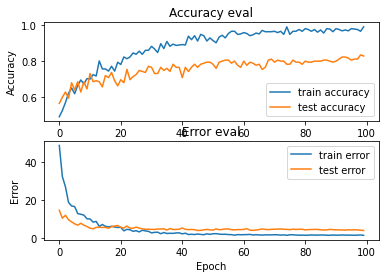

In [1151]:
plot_history(history)